# GWAS interpretation
Here we're going to explore and interpret our GWAS results.

## Prepare environment
Loading packages and functions into R

In [52]:
library(lattice) #lattice graphics package (QQ plots)

## Set file names

In [53]:
# change these two
results_file = "./results/subset_flowering_time_16_gwas.csv"
results_file_nc = "./results/subset_flowering_time_16_gwas_nc.csv"

# don't change this one.  We won't look at the effect of MAF cutoff in your self-run GWAS
results_file_maf1 = './prerun_results/subset_flowering_time_16_gwas_maf1.csv'

## Load GWAS results
Load results file generated in the GWAS notebook (2_GWAS.ipynb) into R.
As a reminder, the format of this file is...

In [54]:
results <- read.csv(file=results_file, stringsAsFactors=FALSE)
results_nc <- read.csv(file=results_file_nc, stringsAsFactors=FALSE)
results_maf1<- read.csv(file=results_file_maf1, stringsAsFactors=FALSE)

# Make sure what we've loaded is as expected
dim(results)
head(results)

dim(results_nc)
head(results_nc)

dim(results_maf1) ### to save space, I only outputted the chromosome, position, and p-value for this GWAS
head(results_maf1)

[1] 125066      6

,chr,pos,pvalue,maf,mac,GVE
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,1,502,0.7717972,0.3764706,64,1.0650243
2,1,730,0.6541376,0.3117647,53,1.7657506
3,1,1260,0.7677716,0.3000000,51,1.1713182
4,1,8193,0.5058976,0.3117647,53,2.6914488
5,1,17689,0.7401375,0.3647059,62,-0.9188268
6,1,21043,0.3169882,0.2882353,49,-3.5980395


[1] 125066      6

,chr,pos,pvalue,maf,mac,GVE
,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
1,1,502,1.510960e-04,0.3764706,64,15.021128
2,1,730,1.871403e-05,0.3117647,53,17.643592
3,1,1260,1.998490e-05,0.3000000,51,17.776611
4,1,8193,3.856592e-06,0.3117647,53,18.959509
5,1,17689,9.160432e-03,0.3647059,62,10.513366
6,1,21043,2.210387e-01,0.2882353,49,5.287499


[1] 372179      3

,chr,pos,pvalue
,<int>,<int>,<dbl>
1,1,237,4.319427e-01
2,1,291,3.094230e-01
3,1,502,7.717972e-01
4,1,617,4.059314e-06
5,1,692,9.162398e-01
6,1,730,6.541376e-01


## Manhattan plot
We will start with an overview of the p-values from our GWAS in a plot know as a Manhattan plot.  On the x axis is the position in the genome, on they y-axis is the -log10 of the GWAS p-value.  

In [48]:
##################################################
### plotting -log10 p-value across the genome by chromosome
### takes results file from script 2
### uses the column headers, so don't change those!
###########################################
at.chr.lengths <- c(30427671,19698289,23459830,18585056,26975502) # the lengths of the 5 chromosomes in A. thaliana

manhattan.plot <- function(results, chr.lengths, title){
  # the plot will change colors to denote new chromsomes.  This section lays the groundwork for this
  chr.add <- c(0,cumsum(chr.lengths))[1:5]
  max.bp <- sum(chr.lengths)
  chr.colors <- rep(c("blue", "dodgerblue"),ceiling(length(chr.lengths/2)))
  chr.mids <- chr.add + (chr.lengths/2)
  results.s <- split(results, results$chr)
  
  # make the actual plot 
  # generate an empty plot with the right dimensions
  plot(results$pos,-log10(results$pvalue), xlim=c(0,max.bp), type="n", xlab="Chromosome", ylab="-log10 p-value", xaxt="n", main=title)
  # set up the x axis
  axis(1,at=chr.mids,labels=c(1:5))
  # does plotting by chromosome
  for(up.chr in 1:length(results.s)){
    #print(up.chr)
    up.c <- results.s[[up.chr]]
    up.add <- chr.add[up.chr]
    up.c$pos.plot <- up.c$pos + up.add
    points(up.c$pos.plot, -log10(up.c$pvalue), col=chr.colors[up.chr])
  }
}

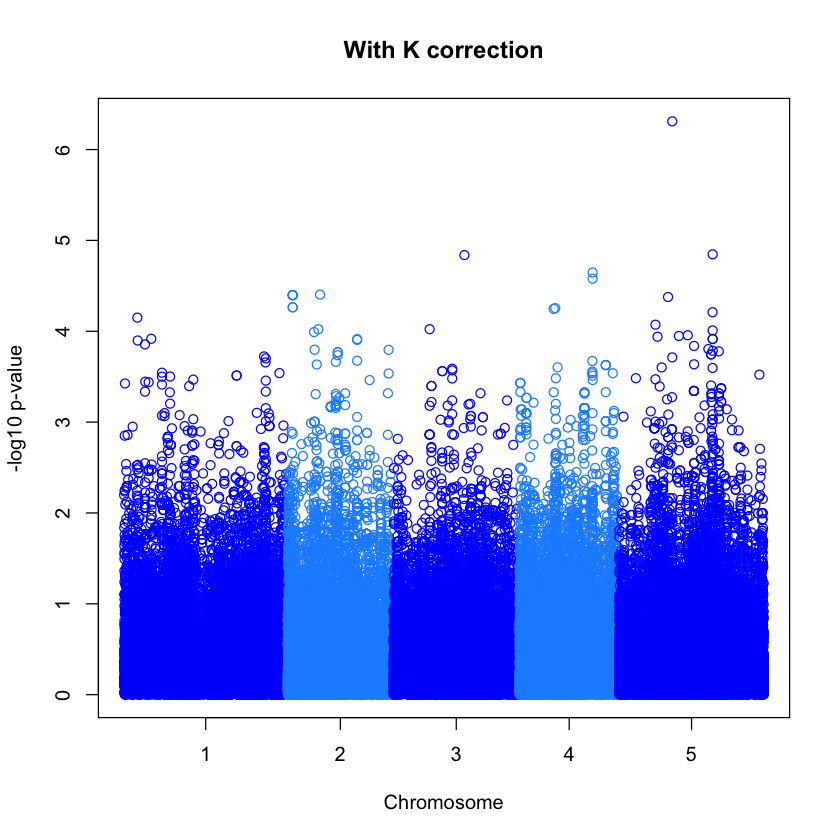

In [55]:
manhattan.plot(results=results, chr.lengths=at.chr.lengths, title="With K correction")

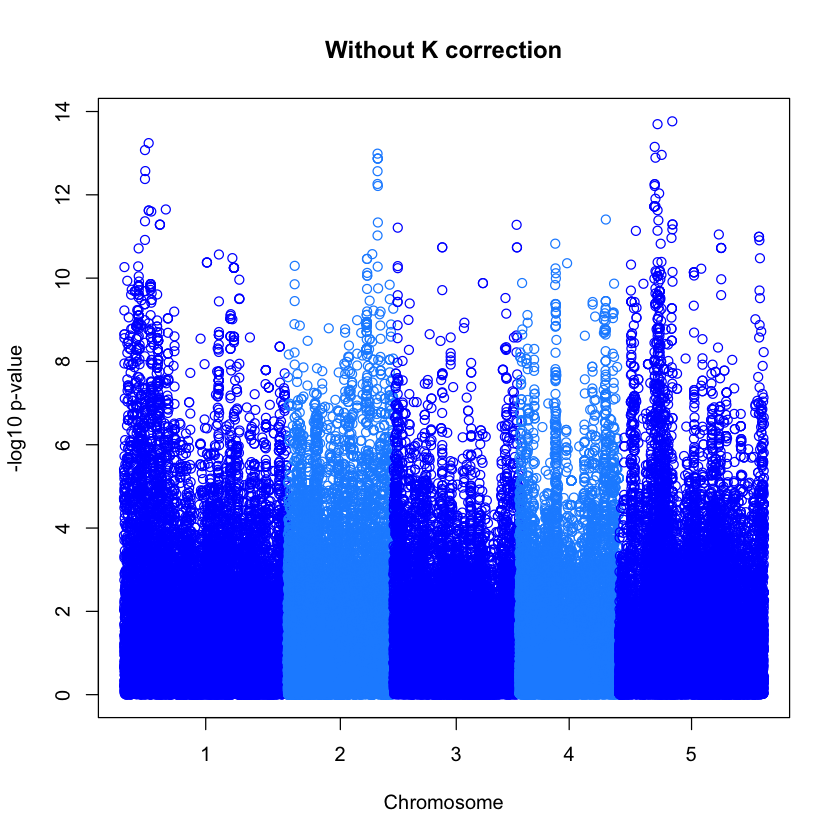

In [56]:
manhattan.plot(results=results_nc, chr.lengths=at.chr.lengths, title="Without K correction")

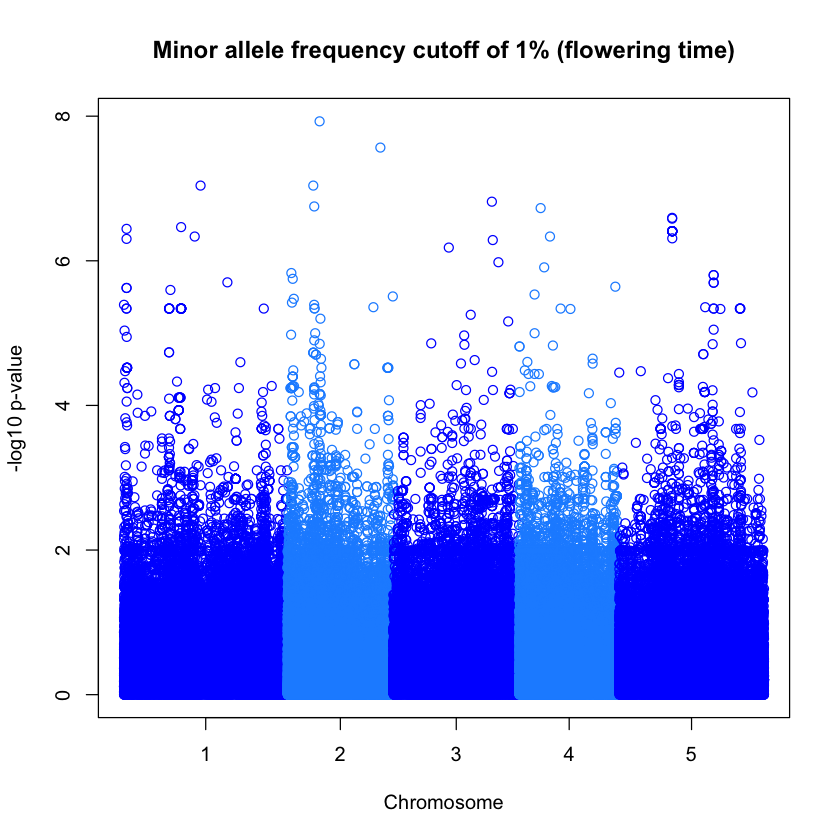

In [58]:
manhattan.plot(results=results_maf1, chr.lengths=at.chr.lengths,title="Minor allele frequency cutoff of 1% (flowering time)")

## Quantile-quantile plot

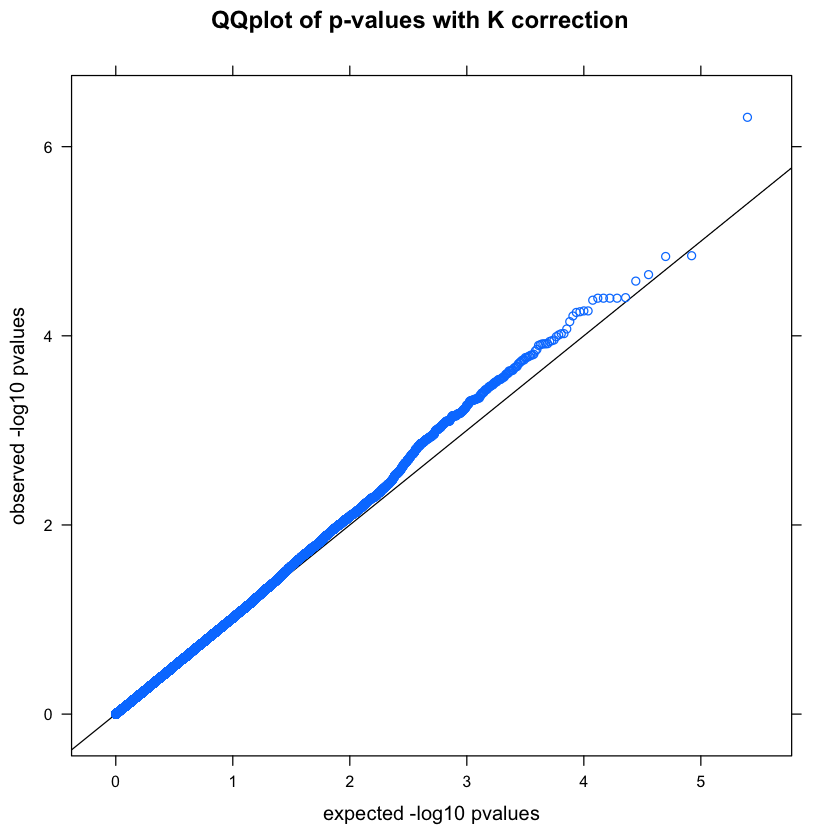

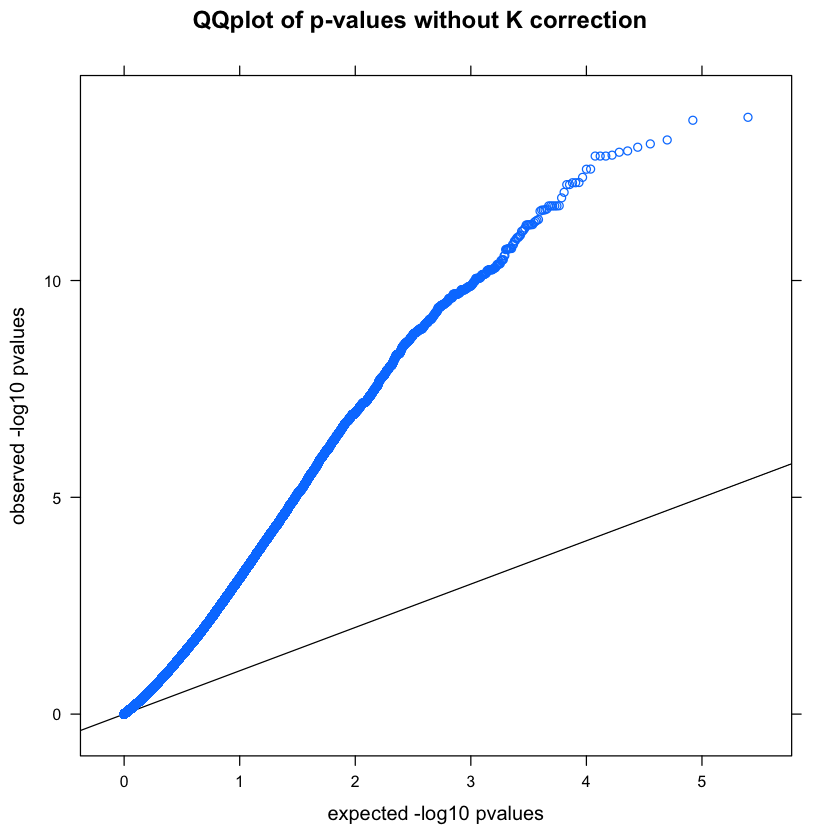

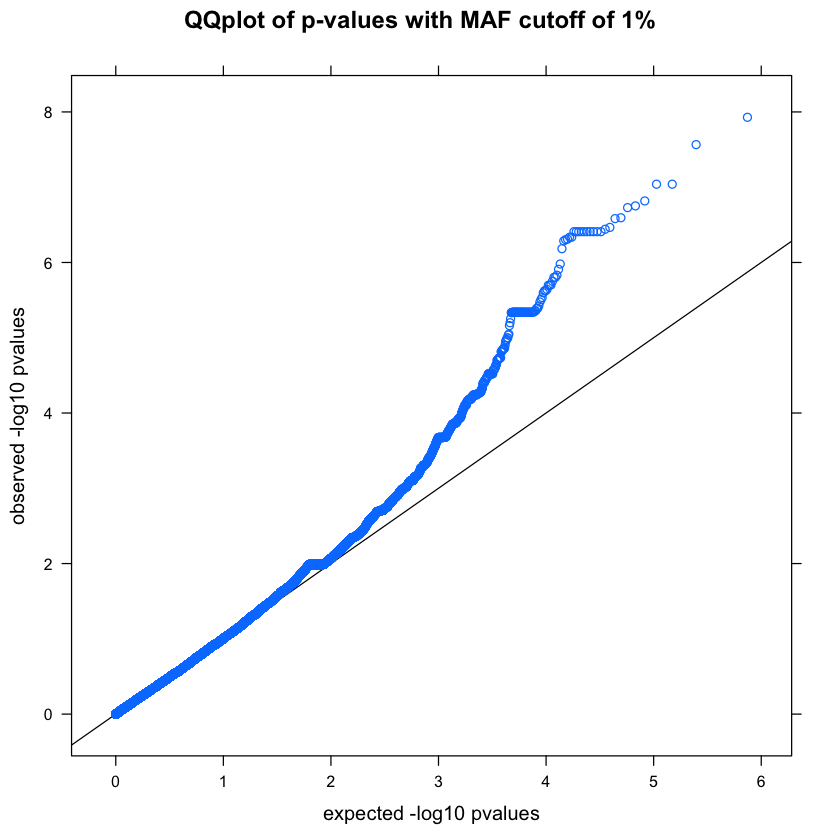

In [59]:

qqmath(~ -log10(results$pvalue), distribution=function(x){-log10(qunif(1-x))},xlab="expected -log10 pvalues", ylab="observed -log10 pvalues", main="QQplot of p-values with K correction",panel = function(x, ...) {
  panel.abline(a=0,b=1)
  panel.qqmath(x, ...)})

qqmath(~ -log10(results_nc$pvalue), distribution=function(x){-log10(qunif(1-x))},xlab="expected -log10 pvalues", ylab="observed -log10 pvalues", main="QQplot of p-values without K correction",panel = function(x, ...) {
  panel.abline(a=0,b=1)
  panel.qqmath(x, ...)})

qqmath(~ -log10(results_maf1$pvalue), distribution=function(x){-log10(qunif(1-x))},xlab="expected -log10 pvalues", ylab="observed -log10 pvalues", main="QQplot of p-values with MAF cutoff of 1%",panel = function(x, ...) {
  panel.abline(a=0,b=1)
  panel.qqmath(x, ...)})


## Population structure

## Give me a peak
please change title

## Multiple testing

## Minor allele frequency (MAF)

## Nice peak ... now what?